#                                                   TASK -1
### ============================>Prediction using Supervised ML<================================
## AIM :  Predict the percentage of an student based on the no. of study hours.


# 1-Import Libs

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

In [30]:
sns.set_theme( style = 'whitegrid' , palette = 'Set2')

# 2- Load Data

In [31]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3- Understanding The Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 4- Data Wrangling

In [34]:
df.columns=['Hours',"Scores in %"]

In [35]:
df.head()

,Hours,Scores in %
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 5- Data analysis and visualization

Text(0, 0.5, 'Percentage Score')

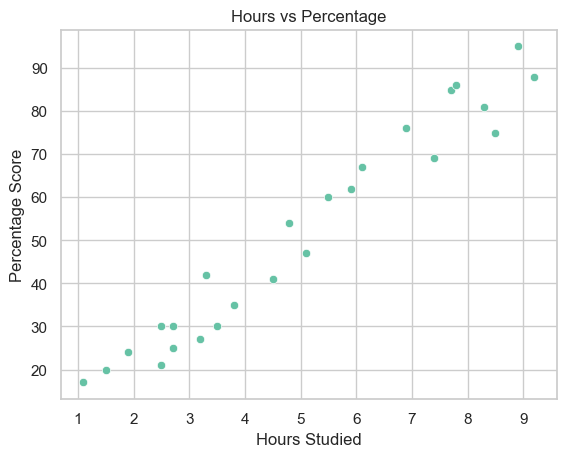

In [36]:
#Relation between Hours VS Percentage
sns.scatterplot(data = df , y = df['Scores in %'] , x = df['Hours'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

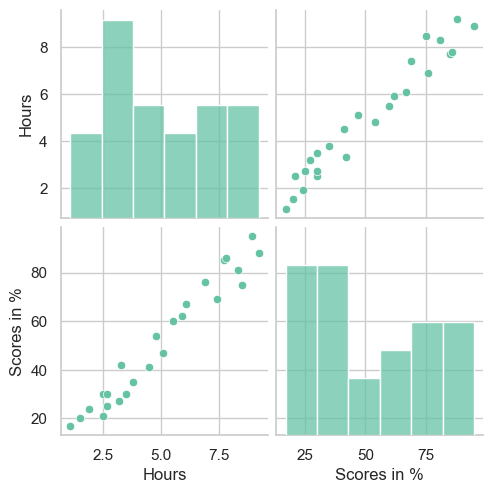

In [37]:
#show more info like mode value and min or max value
sns.pairplot(df)

<AxesSubplot:xlabel='Hours', ylabel='Density'>

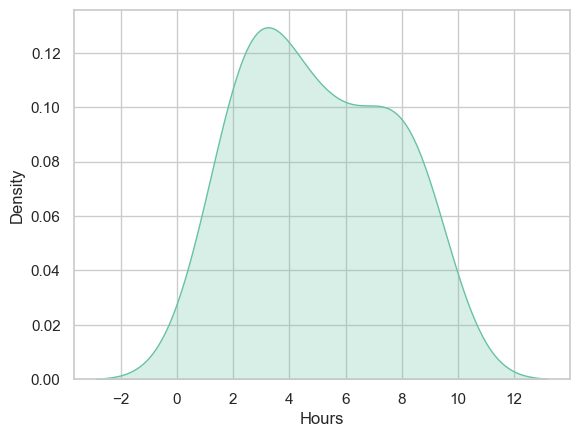

In [38]:
# Distribution of Hours
sns.set_theme( style = 'whitegrid' , palette = 'Set2')
sns.kdeplot(data=df , x = df['Hours'] , shade = True)

<AxesSubplot:xlabel='Scores in %', ylabel='Density'>

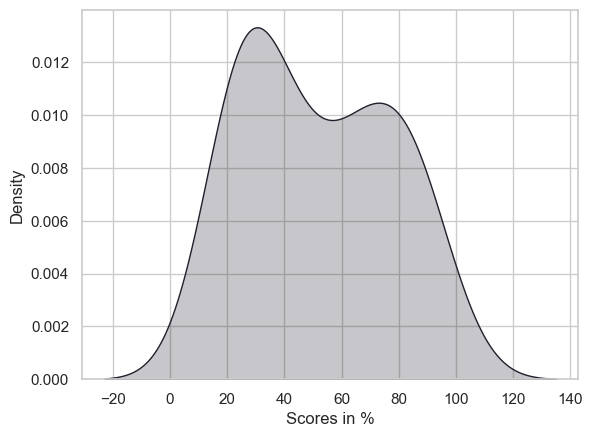

In [39]:
# Distribution of Percentage
sns.set_theme( style = 'whitegrid' , palette = 'bone')
sns.kdeplot(data=df , x = df['Scores in %'] , shade = True)

In [40]:
def passing(x):
    if x>50:
        return "Success"
    else :
        return "fail"

In [41]:
df["passing"]=df["Scores in %"].apply(lambda x:passing(x))

In [42]:
df.head()

,Hours,Scores in %,passing
0,2.5,21,fail
1,5.1,47,fail
2,3.2,27,fail
3,8.5,75,Success
4,3.5,30,fail


In [43]:
pass_df=pd.DataFrame(df['passing'].value_counts().reset_index(level=0))
pass_df.columns=["Passing","counts"]
pass_df

,Passing,counts
0,fail,13
1,Success,12


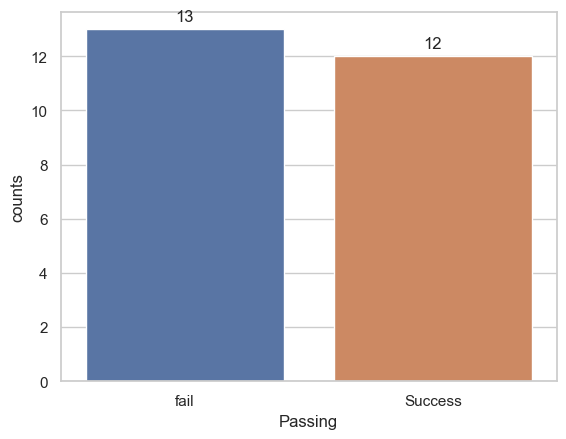

In [44]:
splot=sns.barplot(x='Passing', y='counts', palette="deep", data=pass_df,)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

<AxesSubplot:>

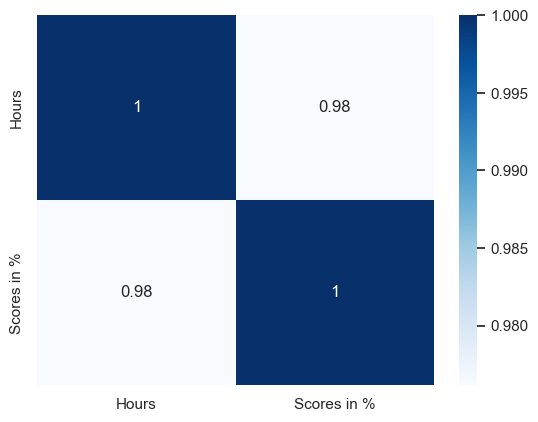

In [45]:
#Finding Corr 
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

# 6-Split Data

In [46]:
X=df["Hours"]
y=df["Scores in %"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , 
                                                      shuffle = True , random_state = 0)

# 7-Model (Linear Regression)

In [47]:
model = LinearRegression()  
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

model.fit(X_train, y_train) 

LinearRegression()

### Linear Eq:
$$c = a*x+b$$
#### x : Coef. of a

#### b : intercept


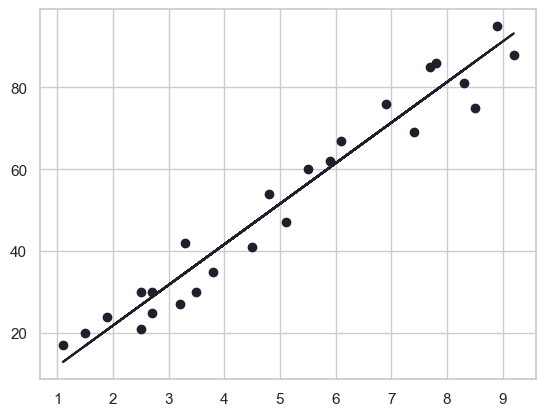

In [49]:
line = model.coef_*X+model.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [24]:
y_pred = model.predict(X_test)

# 8-Model Evaluation

In [25]:
# mean_squared_error
mean_squared_error(y_true = y_test , y_pred = y_pred )


21.5987693072174

In [28]:
# R2 Score
print(f"r2 : {(r2_score(y_true = y_test , y_pred = y_pred)*100).round()} %")

r2 : 95.0 %


# 9- Question of Task
#### What will be predicted score if a student studies for 9.25 hrs/day?

In [29]:
y_pred2 = model.predict([[9.25]])
print(f" predicted score if a student studies for 9.25 hrs/day will be {y_pred2[0].round()}")

 predicted score if a student studies for 9.25 hrs/day will be 94.0
